In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# first Model !!!

model = tf.keras.Sequential([tf.keras.layers.Dense(units = 1, input_shape=[1])])
model.compile(optimizer="sgd", loss="mean_squared_error")  

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

model.fit(xs,ys, epochs=50)
print(model.predict([10.0]))

W0713 12:07:04.226856 139792176879488 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/50
6/6 [==============================] - 0s 13ms/sample - loss: 75.7283
Epoch 2/50
6/6 [==============================] - 0s 912us/sample - loss: 59.5811
Epoch 3/50
6/6 [==============================] - 0s 445us/sample - loss: 46.8771
Epoch 4/50
6/6 [==============================] - 0s 274us/sample - loss: 36.8823
Epoch 5/50
6/6 [==============================] - 0s 384us/sample - loss: 29.0188
Epoch 6/50
6/6 [==============================] - 0s 381us/sample - loss: 22.8321
Epoch 7/50
6/6 [==============================] - 0s 366us/sample - loss: 17.9647
Epoch 8/50
6/6 [==============================] - 0s 436us/sample - loss: 14.1353
Epoch 9/50
6/6 [==============================] - 0s 304us/sample - loss: 11.1224
Epoch 10/50
6/6 [==============================] - 0s 313us/sample - loss: 8.7520
Epoch 11/50
6/6 [==============================] - 0s 215us/sample - loss: 6.8870
Epoch 12/50
6/6 [==============================] - 0s 286us/sample - loss: 5.4198
Epoch 13/50
6/6 [

In [0]:
# Get the dataset

mnist = tf.keras.datasets.fashion_mnist

In [5]:
# Load the data into the training and test sets

(training_images,training_labels),(testing_images,testing_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9


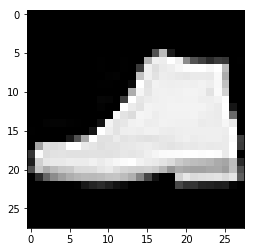

In [26]:
# View one of the images using matplot library
plt.imshow(training_images[42])
print(training_labels[0])
#print(training_images[0])


# to normalise our data
training_images = training_images/255
esting_images = testing_images/255

In [27]:
# Design the neural network

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10,activation = tf.nn.softmax)])

# specify the optimizer and loss funtion
model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy'
             ,metrics=['accuracy'])

# train the model
model.fit(training_images, training_labels, epochs = 6)

Epoch 1/6
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4728 - acc: 0.8301
Epoch 2/6
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3583 - acc: 0.8681
Epoch 3/6
60000/60000 [==============================] - 8s 125us/sample - loss: 0.3215 - acc: 0.8815
Epoch 4/6
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3006 - acc: 0.8885
Epoch 5/6
60000/60000 [==============================] - 9s 143us/sample - loss: 0.2788 - acc: 0.8976
Epoch 6/6
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2662 - acc: 0.9007


Adding layers above doesn't help much as the data is relatively simple. For complex data adding more layers definitely helps a lot

For the case of having more nodes in a layer. It really helps till you reach the soft limit above which you get diminishing returns.

For normalization and whether to do it or not this is a very good explaination:
https://stackoverflow.com/questions/48284427/why-should-we-normalize-data-for-deep-learning-in-keras

In [28]:
# Evaluate your model 

model.evaluate(testing_images,testing_labels)

10000/10000 [==============================] - 1s 72us/sample - loss: 0.3521 - acc: 0.8780


[0.35206350176334383, 0.878]

In [21]:
# Extra tidbits

classifications = model.predict(testing_images)
print(classifications[0])
print(testing_labels[0])

[2.3062375e-05 6.6045294e-07 6.0695043e-06 6.7726899e-07 6.3849654e-07
 7.9286452e-03 1.7720335e-05 2.8944570e-01 1.3205703e-04 7.0244479e-01]
9


Using callbacks to stop the training when the model reaches a certain accuracy

In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc') > 0.9):
      print('\n Reached 95 percent accuracy so stopping the learning!')
      self.model.stop_training = True

callbacks = myCallback()

model.fit(training_images,training_labels,epochs = 10, callbacks = [callbacks])

Epoch 1/10
59712/60000 [============================>.] - ETA: 0s - loss: 0.1727 - acc: 0.9346
 Reached 95 percent accuracy so stopping the learning!
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1727 - acc: 0.9346
